# CLUSTERING

### K-Means:
- Simple & fast
- Works well when clusters are compact & spherical
- we can decide number of clusters (K)
- Needs validation → Silhouette & Davies–Bouldin

### DBSCAN:
- Finds clusters based on density
- No need to give K
- Can detect outliers (noise = -1)
- Works well for arbitrary-shaped clusters

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the DataSet

data = pd.read_excel('EastWestAirlines.xlsx', sheet_name=1)
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


#### Basic Data Exploration (EDA)

In [4]:
data.shape

(3999, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
# Cheking Missing Values
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
# Removing non-informative columns (like IDs)

data.drop(columns=['ID#'], inplace=True)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


- Looks Award? is Target variable
- we need to remove for further analysis

In [9]:
X = data.drop(columns=['Award?'])
X.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


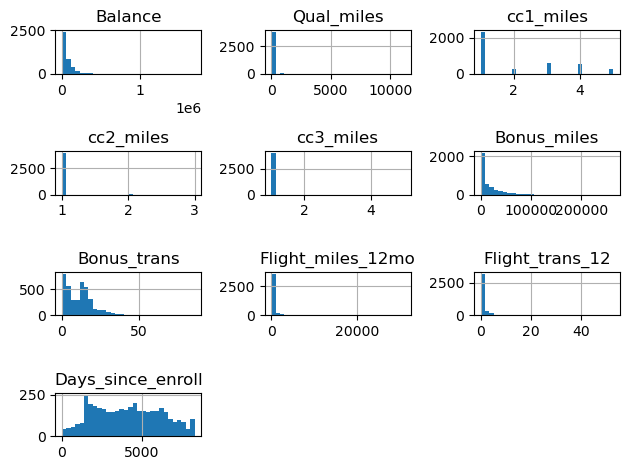

In [10]:
# Feature distributions
X.hist(bins=30)
plt.tight_layout()
plt.show()

In [11]:
# Cheking Correlation of Features

X.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000


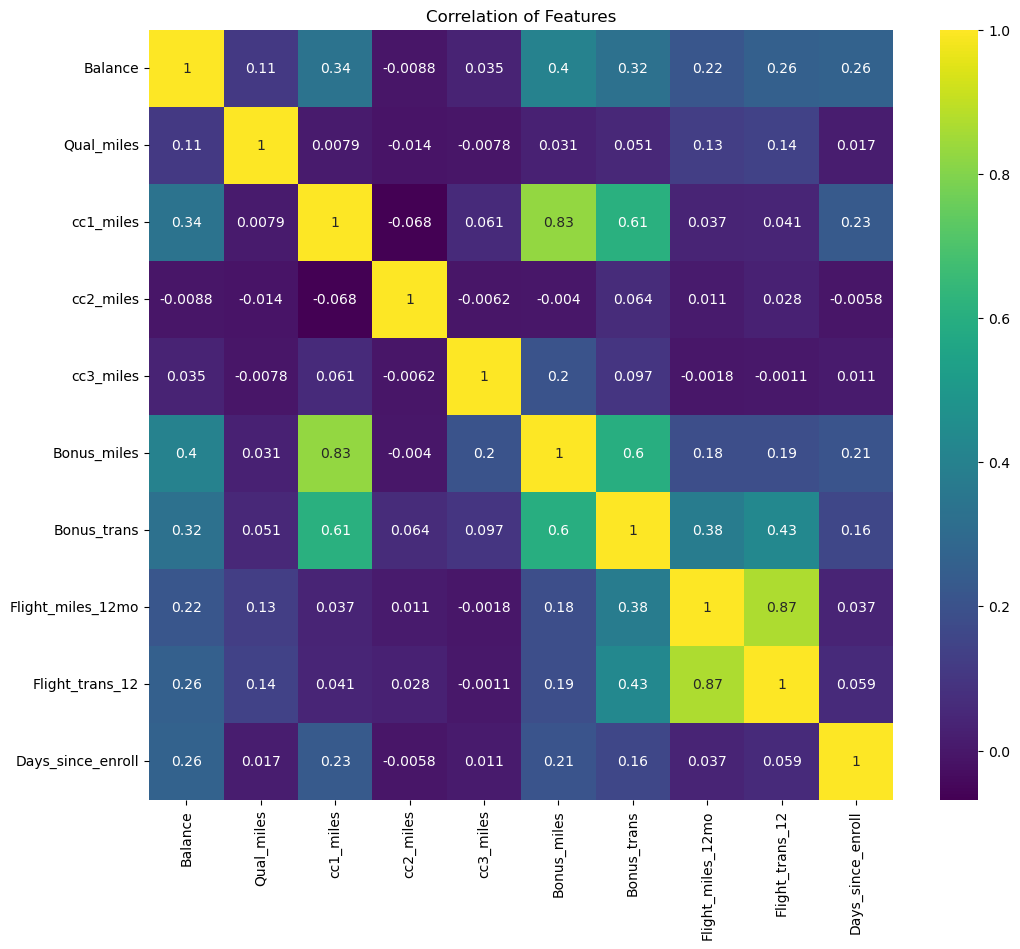

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True, cmap='viridis')
plt.title('Correlation of Features')
plt.show()

- Some Features are correlated
- need to look more

### Scaling for All Features

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975


# KMeans Clustering

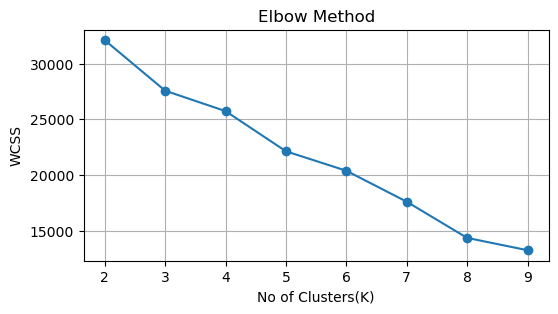

In [14]:
# Using Elbow Method 

from sklearn.cluster import KMeans

wcss = []
k_range = range(2,10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,3))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('No of Clusters(K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [15]:
# To find best K value, using silhouette & db scores

from sklearn.metrics import silhouette_score, davies_bouldin_score
sil_scores = []
db_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    sil_scores.append(silhouette_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))

for k, s, d in zip(K_range, sil_scores, db_scores):
    print(f"K={k} | Silhouette={s:.3f} | Davies-Bouldin={d:.3f}")


K=2 | Silhouette=0.358 | Davies-Bouldin=1.520
K=3 | Silhouette=0.332 | Davies-Bouldin=1.287
K=4 | Silhouette=0.276 | Davies-Bouldin=1.598
K=5 | Silhouette=0.275 | Davies-Bouldin=1.322
K=6 | Silhouette=0.243 | Davies-Bouldin=1.327
K=7 | Silhouette=0.256 | Davies-Bouldin=1.283
K=8 | Silhouette=0.269 | Davies-Bouldin=1.092
K=9 | Silhouette=0.263 | Davies-Bouldin=1.096


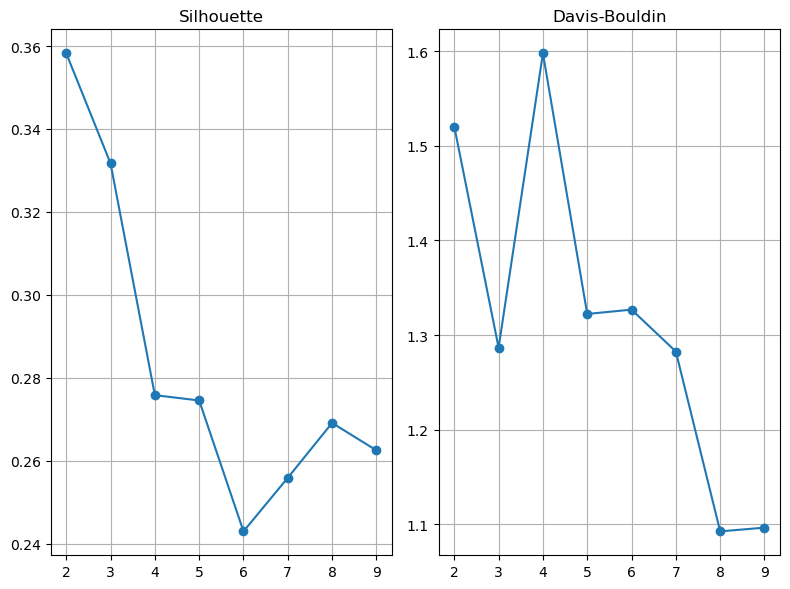

In [16]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.title('Silhouette')
plt.plot(k_range, sil_scores, marker='o')
plt.grid()


plt.subplot(1,2,2)
plt.title('Davis-Bouldin')
plt.plot(k_range, db_scores, marker='o')
plt.tight_layout()
plt.grid()
plt.show()

- As per my Observations , K=2 is best
- Highest Silhouette score (strongest structure)
- Clear elbow-like behavior in Silhouette
- DB improvement after K=2 is gradual, not decisive

#### Final KMeans Model

In [17]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

kmeans_sil = silhouette_score(X_scaled, kmeans_labels)
kmeans_db  = davies_bouldin_score(X_scaled, kmeans_labels)


print("Clusters:", len(set(kmeans_labels)))
print("Silhouette:", round(kmeans_sil, 3))
print("Davies-Bouldin:", round(kmeans_db, 3))


Clusters: 2
Silhouette: 0.358
Davies-Bouldin: 1.52


#### K-Means Visualization (PCA)

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scaled)

In [19]:
n_comp = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.90) +1
print('Number of Components :', n_comp)

Number of Components : 7


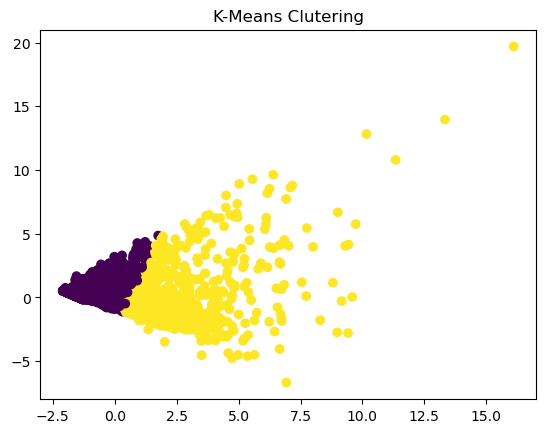

In [20]:

pca = PCA(n_components=8, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels)
plt.title('K-Means Clutering')
plt.show()

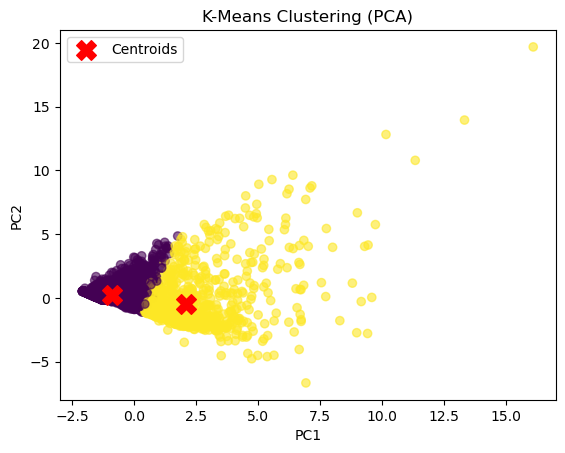

In [21]:
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            c='red', s=200, marker='X', label='Centroids')
plt.legend()
plt.title('K-Means Clustering (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [22]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())


Explained variance ratio: [0.30501158 0.17274067 0.10508707 0.10079795 0.09601882 0.09056171
 0.06715325 0.03629685]
Total variance explained: 0.9736678970003713


In [23]:
import pandas as pd

data_clusters = pd.DataFrame(X_scaled, columns=data.columns)
data_clusters['Cluster'] = kmeans_labels

cluster_summary = data_clusters.groupby('Cluster').mean()
print(cluster_summary)


          Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
Cluster                                                                       
0       -0.290788   -0.065972  -0.517840   0.023019  -0.060933    -0.471442   
1        0.673442    0.152787   1.199275  -0.053309   0.141115     1.091823   

         Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Cluster                                                                       
0          -0.413090          -0.168780        -0.186958          -0.188523   
1           0.956683           0.390881         0.432980           0.436605   

         Award?  
Cluster          
0           NaN  
1           NaN  


In [24]:
pd.Series(kmeans_labels).value_counts()


0    2793
1    1206
Name: count, dtype: int64

## DBSCAN : Density-Based Spatial Clustering of Applications with Noise 

- To find best eps & min_samples
- usually we used (min_samples = 2 * No.Of Features )

In [25]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3999 non-null   float64
 1   Qual_miles         3999 non-null   float64
 2   cc1_miles          3999 non-null   float64
 3   cc2_miles          3999 non-null   float64
 4   cc3_miles          3999 non-null   float64
 5   Bonus_miles        3999 non-null   float64
 6   Bonus_trans        3999 non-null   float64
 7   Flight_miles_12mo  3999 non-null   float64
 8   Flight_trans_12    3999 non-null   float64
 9   Days_since_enroll  3999 non-null   float64
dtypes: float64(10)
memory usage: 312.6 KB


In [26]:
from sklearn.neighbors import NearestNeighbors

min_samples = 2 * 10
nn = NearestNeighbors(n_neighbors= min_samples)
nn.fit(X_scaled)

NearestNeighbors(n_neighbors=20)

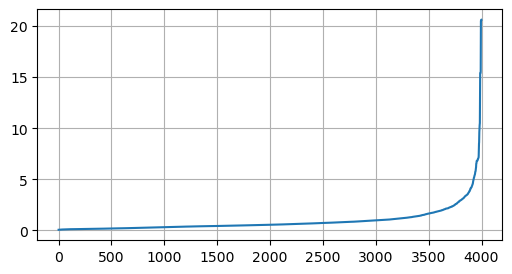

In [27]:
distances, _ = nn.kneighbors(X_scaled)
k_distances = np.sort(distances[:,-1])

plt.figure(figsize=(6,3))
plt.plot(k_distances)
plt.grid()
plt.show()

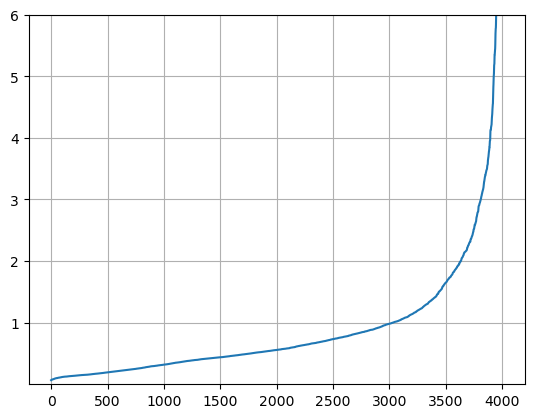

In [28]:
plt.plot(k_distances)
plt.ylim(0,6)
plt.yticks([1,2,3,4,5,6])
plt.grid()
plt.show()

- as per my understading, eps value between the range of 1.5 to 3.0
- will verify each value with noice

In [29]:
from sklearn.cluster import DBSCAN


for eps in [1.5,1.6,1.7,1.8,2.0,2.2,2.4,2.6,2.8,3.0]:
    labels = DBSCAN(eps=eps, min_samples=20).fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noice = list(labels).count(-1) / len(labels)

    if n_clusters > 1:
        sil = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
    else:
        sil = -1
    print(f"eps={eps} | clusters={n_clusters} | noice={noice:.2f} | sil={sil:.3f}")


eps=1.5 | clusters=1 | noice=0.10 | sil=-1.000
eps=1.6 | clusters=2 | noice=0.08 | sil=0.636
eps=1.7 | clusters=2 | noice=0.07 | sil=0.632
eps=1.8 | clusters=2 | noice=0.07 | sil=0.628
eps=2.0 | clusters=2 | noice=0.06 | sil=0.623
eps=2.2 | clusters=2 | noice=0.05 | sil=0.618
eps=2.4 | clusters=2 | noice=0.04 | sil=0.612
eps=2.6 | clusters=2 | noice=0.04 | sil=0.609
eps=2.8 | clusters=2 | noice=0.03 | sil=0.603
eps=3.0 | clusters=2 | noice=0.03 | sil=0.597


#### Final DBSCAN Model

In [30]:
dbscan = DBSCAN(eps=1.6, min_samples=20)
dbscan_labels = dbscan.fit_predict(X_scaled)


In [31]:
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
noise_ratio = list(dbscan_labels).count(-1) / len(dbscan_labels)


print("Clusters:", dbscan_clusters)
print("Noise ratio:", round(noise_ratio, 3))

Clusters: 2
Noise ratio: 0.083


#### Validation

In [32]:
mask = dbscan_labels != -1
n_clusters = len(set(dbscan_labels[mask]))


if n_clusters > 1:
    sil_dbscan = silhouette_score(X_scaled[mask],dbscan_labels[mask])
    db_dbscan = davies_bouldin_score(X_scaled[mask],dbscan_labels[mask])
    
    print("DBSCAN Silhouette Score :", round(sil_dbscan, 3))
    print("DBSCAN Davies-Bouldin  :", round(db_dbscan, 3))

else:
    print("Validation not defined (only one cluster)")

DBSCAN Silhouette Score : 0.636
DBSCAN Davies-Bouldin  : 0.405


#### DBSCAN Visualization (PCA)

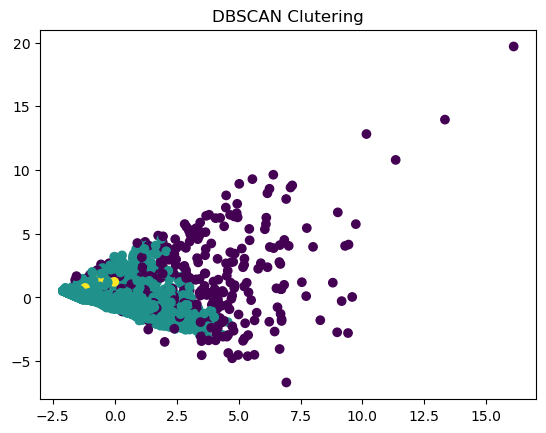

In [33]:

pca = PCA(n_components=8, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels)
plt.title('DBSCAN Clutering')
plt.show()

### Comparing Both Models

In [34]:
comparison = pd.DataFrame({
    "Model": ["K-Means", "DBSCAN"],
    "Clusters": [len(set(kmeans_labels)), dbscan_clusters],
    "Silhouette Score": [
        round(kmeans_sil, 3),
        round(sil_dbscan, 3) if sil_dbscan is not None else None
    ],
    "Davies-Bouldin": [
        round(kmeans_db, 3),
        round(db_dbscan, 3)
        
    ],
    "Noise Handling": ["No", "Yes(0.083)"]
})

comparison


,Model,Clusters,Silhouette Score,Davies-Bouldin,Noise Handling
0,K-Means,2,0.358,1.520,No
1,DBSCAN,2,0.636,0.405,Yes(0.083)


#### Comparing Both Visualizations

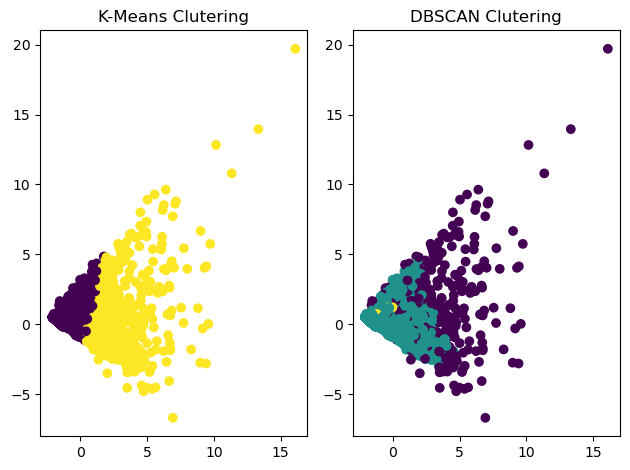

In [35]:


plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels)
plt.title('K-Means Clutering')

plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels)
plt.title('DBSCAN Clutering')

plt.tight_layout()
plt.show()

#### Conclusion

- DBSCAN performs better because it forms density-based clusters and removes noise.
- got better results
- max_Silhouette Score & min_Davies-Bouldin score
- improving cluster quality.